<a href="https://colab.research.google.com/github/EvanCWoods/movie-sentiment/blob/model/movie_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np

In [2]:
# Load the data
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
# Show the data
print(len(train_data), len(test_data))
print(train_data[0])
print(test_data[0])

25000 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4

In [4]:
# Word index
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
# Reserve word index 0-3
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNISED>'] = 3
# Reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:
# Pad the data
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, 
                                                           maxlen=256, 
                                                           padding='post',
                                                           value=word_index['<PAD>'])
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                         maxlen=256,
                                                         padding='post',
                                                         value=word_index['<PAD>']) 

# Check the padding
print(len(train_data[0]), len(test_data[0]))

256 256


In [6]:
# Decode the data
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [7]:
val_data = test_data[:10000]
val_labels = test_labels[:10000]
test_data = test_data[10000:]
test_labels = test_labels[10000:]

In [24]:
# Create the model
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
history = model.fit(train_data, 
                      train_labels,
                      epochs=10,
                      batch_size=512,
                      validation_data=(val_data, val_labels))

Epoch 1/10
49/49 [==============================] - 2s 21ms/step - loss: 0.6918 - accuracy: 0.6041 - val_loss: 0.6886 - val_accuracy: 0.7118
Epoch 2/10
49/49 [==============================] - 1s 18ms/step - loss: 0.6754 - accuracy: 0.7411 - val_loss: 0.6502 - val_accuracy: 0.7829
Epoch 3/10
49/49 [==============================] - 1s 18ms/step - loss: 0.5829 - accuracy: 0.8088 - val_loss: 0.5069 - val_accuracy: 0.8151
Epoch 4/10
49/49 [==============================] - 1s 18ms/step - loss: 0.4168 - accuracy: 0.8520 - val_loss: 0.3687 - val_accuracy: 0.8547
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 0.3100 - accuracy: 0.8825 - val_loss: 0.3206 - val_accuracy: 0.8680
Epoch 6/10
49/49 [==============================] - 1s 18ms/step - loss: 0.2588 - accuracy: 0.9012 - val_loss: 0.2985 - val_accuracy: 0.8753
Epoch 7/10
49/49 [==============================] - 1s 18ms/step - loss: 0.2266 - accuracy: 0.9156 - val_loss: 0.2904 - val_accuracy: 0.8784
Epoch 8/10
49

In [25]:
results = model.evaluate(test_data, test_labels)
print(results)

469/469 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.8817
[0.295852929353714, 0.8817333579063416]


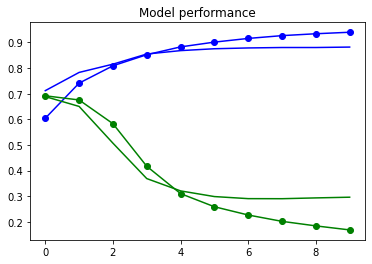

In [32]:
import matplotlib.pyplot as plt

def show_model_results(history):
  plt.plot(history.history['accuracy'], c='b', marker='o', label='accuracy')
  plt.plot(history.history['val_accuracy'], c='b', label='val_accuracy')
  plt.plot(history.history['loss'], c='g', marker='o', label='loss')
  plt.plot(history.history['val_loss'], c='g', label='val_loss')
  plt.title('Model performance')

show_model_results(history=history)